In [1]:
#!/usr/bin/env python3
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [2]:
import pathlib
path = pathlib.Path().absolute()
graph_lib = path.joinpath("benchmark").joinpath("graphs")
import kube_env
import kube_util as util

In [3]:
filters = ["online_boutique_benchmark_no_filter_40_horizontal_stats", 
           "online_boutique_benchmark_empty_filter_40_horizontal_rs-empty-filter_stats",
           "online_boutique_benchmark_snicket_filter_distributed_40_horizontal_snicket_filter_distributed_stats"
          ]
stats = []
for filter in filters:
    stats.append(f"{graph_lib}/autoscaling_experiments/{filter}.csv")
#filters.append("no_filter")
#stats.append(f"{graph_lib}/online_boutique_benchmark_stats.csv")


In [4]:
dfs = []
pref_path = "Aggregated"
for stat_file in stats:
    print(stat_file)
    df = pd.read_csv(stat_file)
    latency = []                                                            
    percentages = [10, 20, 30, 40, 50, 66, 75, 80, 90, 95, 98, 99, 100]
    
    path_df = df.loc[df["Name"] == pref_path]                            
    for percentile in percentages:                                          
        key = str(percentile)                                               
        latency.append(float(path_df[f"{key}%"]))                           
    dfs.append(                                                             
        pd.DataFrame({                                                      
            "Latency (ms)": latency,                                        
            "Percent": percentages                                          
    }))
    

/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/autoscaling_experiments/online_boutique_benchmark_no_filter_40_horizontal_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/autoscaling_experiments/online_boutique_benchmark_empty_filter_40_horizontal_rs-empty-filter_stats.csv
/Users/jessicaberg/Documents/Tracing/tracing_env/kubernetes_env/benchmark/graphs/autoscaling_experiments/online_boutique_benchmark_snicket_filter_distributed_40_horizontal_snicket_filter_distributed_stats.csv


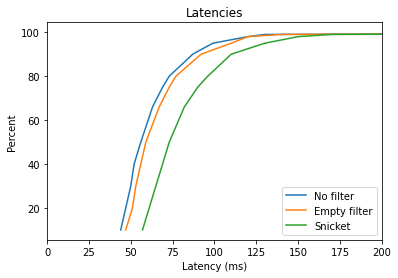

In [5]:
for df in dfs:
    sns.lineplot(data=df, x="Latency (ms)", y="Percent")
plt.legend(labels=["No filter", "Empty filter", "Snicket"], loc="lower right")                                              
plt.xlim(0,200)                                                        
plt.title(f"Latencies") 
new_pref_path = pref_path.replace('/', '')
save_fig_name = f"{graph_lib}/autoscaling_experiments/latencies.pdf"
plt.savefig(save_fig_name,format='pdf') 

<Figure size 432x288 with 0 Axes>